In [3]:
!pip install u8darts

  Using cached filterpy-1.4.5-py3-none-any.whl


In [4]:
from darts.datasets import AirPassengersDataset,MonthlyMilkDataset

In [2]:
import matplotlib.pyplot as plt

In [5]:
AirPassengersDataset().load().pd_dataframe()

component,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [12]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Length: 144, dtype: float64

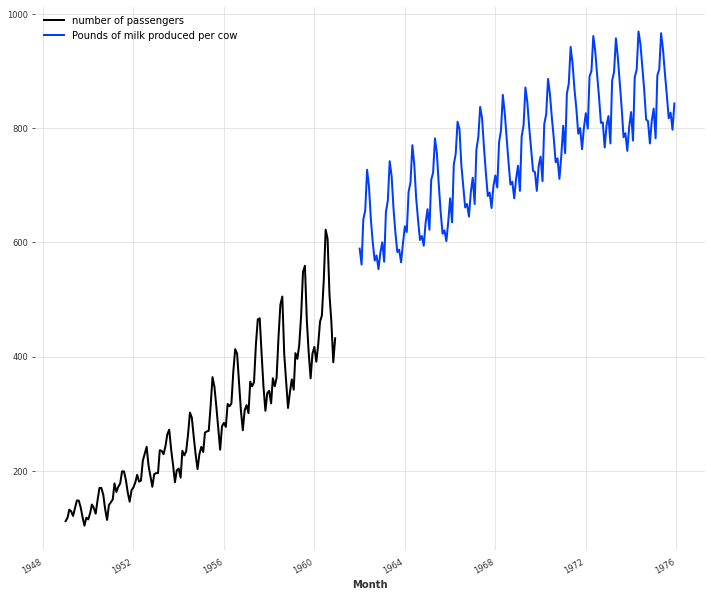

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
series_air=AirPassengersDataset().load()
series_milk=MonthlyMilkDataset().load()

series_air.plot(label='number of passengers')
series_milk.plot(label='Pounds of milk produced per cow ')
plt.legend()

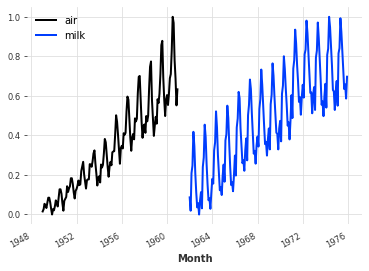

In [20]:
from darts.dataprocessing.transformers import Scaler
scaler_air,scaler_milk= Scaler(),Scaler()
series_air_scaled=scaler_air.fit_transform(series_air)
series_milk_scaled=scaler_milk.fit_transform(series_milk)

series_air_scaled.plot(label='air')
series_milk_scaled.plot(label='milk')
plt.legend()

In [51]:
## Train and validation
train_air,val_air=series_air_scaled[:-36],series_air_scaled[-36:]
train_milk,val_air=series_milk_scaled[:-36],series_milk_scaled[-36:]

In [52]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries,linear_timeseries,sine_timeseries
from darts.models import RNNModel,NBEATSModel,TCNModel,BlockRNNModel,TransformerModel
from darts.metrics import mape,smape

In [53]:
model_air_milk= NBEATSModel(input_chunk_length=24,output_chunk_length=12,n_epochs=100,random_state=0)

In [54]:
model_air_milk.fit([train_air,train_milk],verbose=True)

[2021-11-21 14:32:02,554] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-11-21 14:32:02,554] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-11-21 14:32:02,822] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2021-11-21 14:32:02,822] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/100 [00:00<?, ?it/s]

MAPE =7.58%


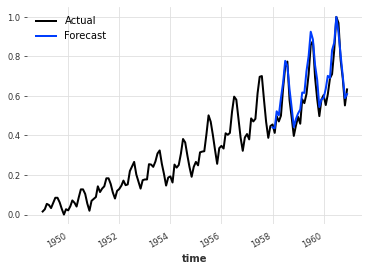

In [55]:
pred=model_air_milk.predict(n=36,series=train_air)

series_air_scaled.plot(label='Actual')
pred.plot(label='Forecast')
print('MAPE ={:.2f}%'.format(mape(series_air_scaled,pred)))

MAPE =14.99%


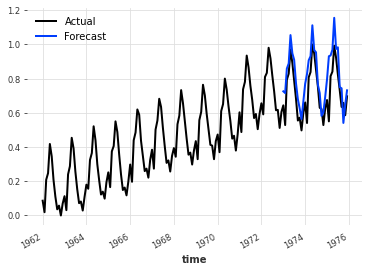

In [56]:
pred=model_air_milk.predict(n=36,series=train_milk)

series_milk_scaled.plot(label='Actual')
pred.plot(label='Forecast')
print('MAPE ={:.2f}%'.format(mape(series_milk_scaled,pred)))